In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [4]:
data=pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

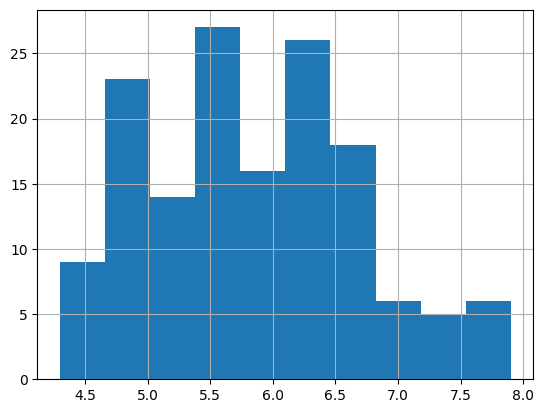

In [10]:
data['sepal_length'].hist()

<Axes: >

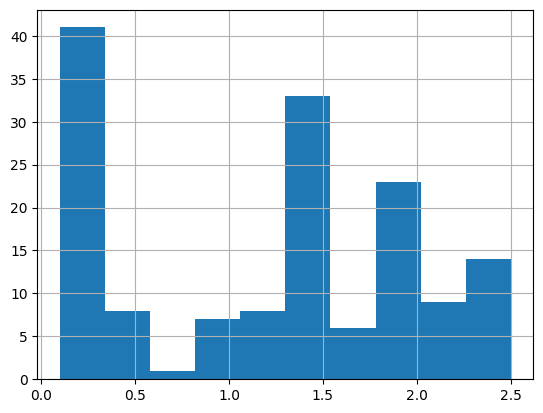

In [12]:
data["petal_width"].hist()

<Axes: >

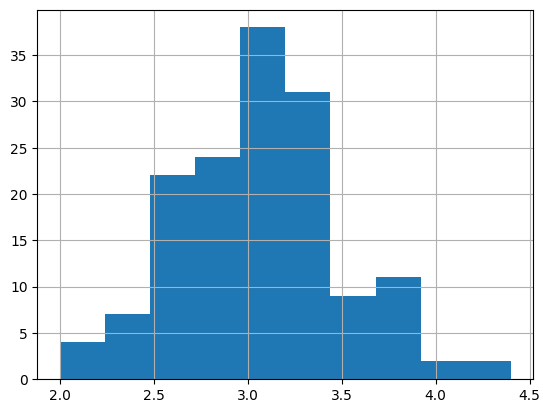

In [13]:
data["sepal_width"].hist()

<Axes: >

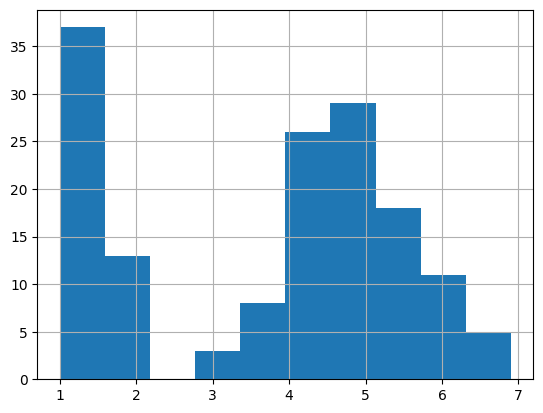

In [14]:
data["petal_length"].hist()

In [15]:
colors=['red', 'orange', 'blue']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


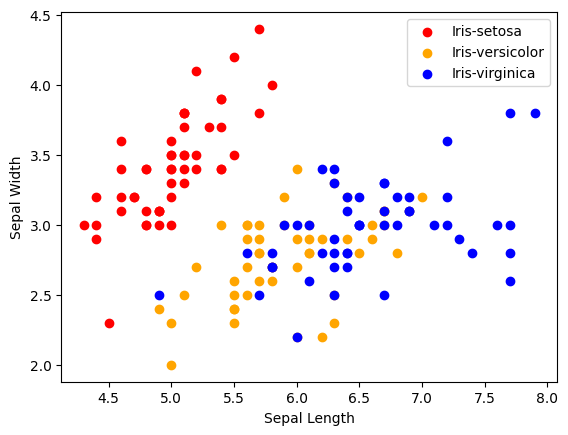

In [20]:
for i in range(3):
    x=data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

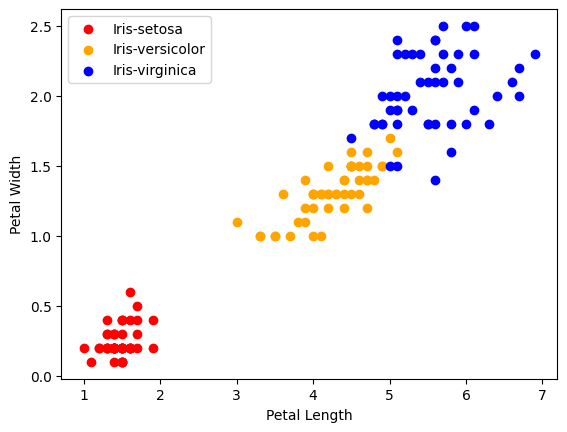

In [21]:
for i in range(3):
    x=data[data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

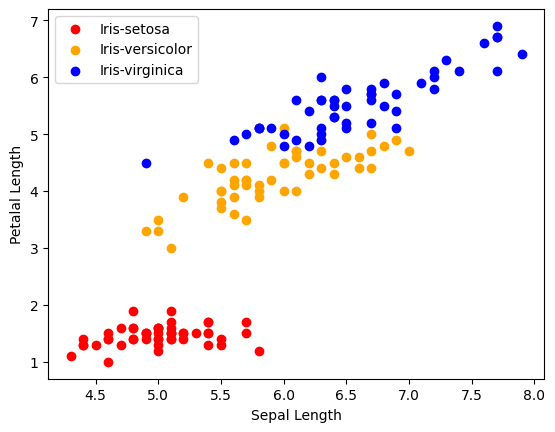

In [22]:
for i in range(3):
    x=data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petalal Length")
    plt.legend()

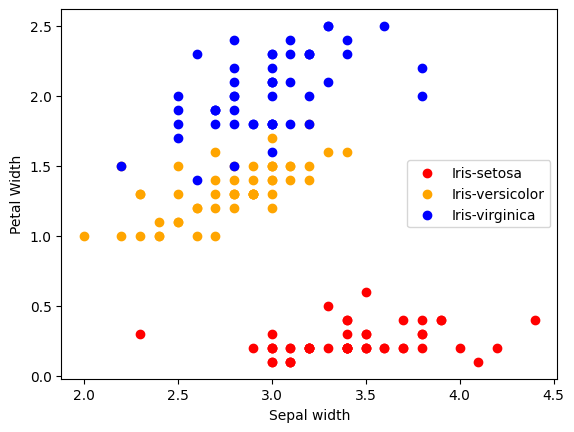

In [23]:
for i in range(3):
    x=data[data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
    plt.xlabel("Sepal width")
    plt.ylabel("Petal Width")
    plt.legend()

In [25]:
data_encoded = pd.get_dummies(data)
correlation_matrix = data_encoded.corr()

In [26]:
data_encoded.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
species_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
species_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
species_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


<Axes: >

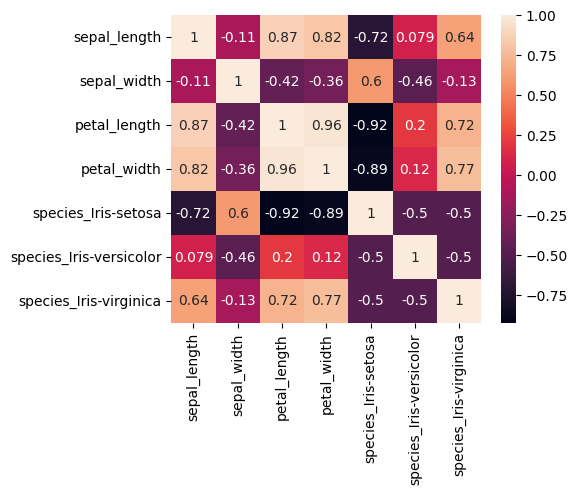

In [29]:
corr = data_encoded.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
data['species'] = le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['species'])
Y=data['species']
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  93.33333333333333
